# Data Prep
This notebook summarizes the steps that went into processing the raw data into the train and test data that was used for the competition.

In [2]:
import os 
import numpy as np
import json
import tifffile as tiff
import random
import matplotlib.pyplot as plt
%matplotlib inline

## Raw Data

### Different Data Files

We have 3 different folders coontaining different data:
* *raw_tiffs*
* *label_json*
* *meta*

In [4]:
rawtiffs_path = '/workspace/Competition/map_segmentation/data/RAW/train/raw_tiffs'
labeljsons_path = '/workspace/Competition/map_segmentation/data/RAW/train/label_json'
metafiles_path = '/workspace/Competition/map_segmentation/data/RAW/train/meta'

raw_tiffs = os.listdir(rawtiffs_path)
label_jsons = os.listdir(labeljsons_path)
meta_files = os.listdir(metafiles_path)

In [6]:
len(raw_tiffs), len(label_jsons), len(meta_files)

(13520, 13520, 13520)

We have 13,520 files of each type. Let's examine the names of the files in each folder.

In [7]:
print(raw_tiffs[0:5])

['LC_AP_37607046_001.tif', 'LC_AP_37607046_002.tif', 'LC_AP_37607046_003.tif', 'LC_AP_37607046_004.tif', 'LC_AP_37607046_005.tif']


In [8]:
print(label_jsons[0:5])

['LC_AP_37607046_001_FGT.json', 'LC_AP_37607046_002_FGT.json', 'LC_AP_37607046_003_FGT.json', 'LC_AP_37607046_004_FGT.json', 'LC_AP_37607046_005_FGT.json']


In [9]:
print(meta_files[0:5])

['LC_AP_37607046_004_META.json', 'LC_AP_37607046_005_META.json', 'LC_AP_37607046_006_META.json', 'LC_AP_37607046_007_META.json', 'LC_AP_37607046_008_META.json']


From the names of the files, it seems like there are label files ('_FGT.json') and meta files ('_META.json') corresponding to each image file ('.tif'). We check to see if this is the case:

In [10]:
rawtiff_names = [x.split('.')[0] for x in raw_tiffs].sort()
labeljson_names = [x.split('_FGT')[0] for x in label_jsons].sort()
metafile_names = [x.split('_META')[0] for x in meta_files].sort()

In [11]:
rawtiff_names == labeljson_names

True

In [12]:
rawtiff_names == metafile_names

True

We confirm that there are label and meta files corresponding to each image file.

### Images

#### Example of 1 image

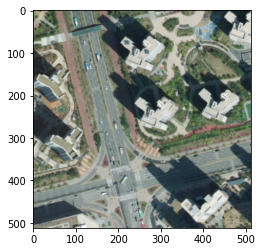

In [13]:
im1_path = os.path.join(rawtiffs_path, raw_tiffs[0])
im1 = tiff.imread(im1_path)

plt.figure()
plt.imshow(im1)

In [14]:
im1.shape

(512, 512, 3)

We can see that the image is an aerial image of a crossroad and has size 512*512 px with 3 color channels.

#### Multiple images

In [ ]:
img_samples = random.sample(raw_tiffs, 9)

plt.figure(figsize=(20,20))
for i in range(9):
    plt.subplot(3,3,i+1)
    impath = os.path.join(rawtiffs_path, img_samples[i])
    im = tiff.imread(impath)
    plt.imshow(im)